### Deep Q-Network (DQN) on LunarLander-v2

#### Import the Necessary Packages

In [1]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import deque

import numpy as np
# rl calsses
from QAgent import Agent


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Instantiate the Environment and Agent

Initialize the environment.

In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


State shape:  (8,)
Number of actions:  4


### Define Neural Network Architecture.

Since `LunarLander-v2` environment is sort of simple envs, we don't need complicated architecture. We just need non-linear function approximator that maps from state to action.

In [3]:
class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)
        
    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = self.fc1(state)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return self.fc3(x)

### Define some hyperparameter

In [4]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Training Process

In [6]:
model_id = 'LunarLander-1'

In [7]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=500.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), f'{model_id}.pth')
            break
        torch.save(agent.qnetwork_local.state_dict(), f'{model_id}.pth')
    return scores

network = QNetwork(8, 4, 0)
agent = Agent(action_size=4,
              seed=0,
              network=network,
              lr=LR,
              buffer_size=BUFFER_SIZE, 
              batch_size=BATCH_SIZE,
              gamma=GAMMA,
              update_step=UPDATE_EVERY,
              tau=TAU
             )
scores = dqn(n_episodes=2000)

Episode 100	Average Score: -149.37
Episode 200	Average Score: -98.842
Episode 300	Average Score: -22.67
Episode 400	Average Score: -15.36
Episode 423	Average Score: -6.477

KeyboardInterrupt: 

### Plot the learning progress

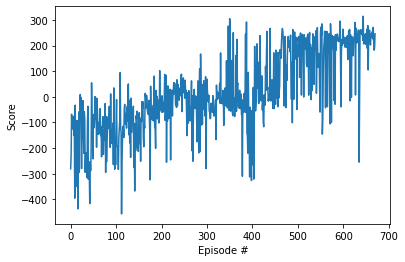

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Animate it with Video

In [12]:
from video import show_video, show_video_of_model
network = QNetwork(8, 4, 0)
agent = Agent(action_size=4,
              seed=0,
              network=network,
              lr=LR,
              buffer_size=BUFFER_SIZE, 
              batch_size=BATCH_SIZE,
              gamma=GAMMA,
              update_step=UPDATE_EVERY,
              tau=TAU
             )
show_video_of_model(agent, 'LunarLander-v2', 'checkpoint', 10000)

In [13]:
show_video('LunarLander-v2', 'first_try')